# 1: Imports and setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# 2: Data loading and cleaning

In [3]:
try:
    df = pd.read_csv('student_habits_performance.csv')
    print("Dataset Loaded Successfully.")
except FileNotFoundError:
    print("Error: CSV file not found. Please upload 'student_habits_performance.csv'.")

Dataset Loaded Successfully.


In [4]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [5]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [6]:
df.drop_duplicates(inplace=True)

print(f"Data Cleaned. Final Shape: {df.shape}")

Data Cleaned. Final Shape: (1000, 16)


# 3: Feature engineering

In [7]:
df['Study_Intensity'] = df['study_hours_per_day'] * 1.5

In [11]:
df['Well_Being_Score'] = (df['sleep_hours'] + df['exercise_frequency']) / 2

In [12]:
df['At_Risk'] = df['exam_score'].apply(lambda x: 1 if x < 60 else 0)

# 4: Data transformation

In [13]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

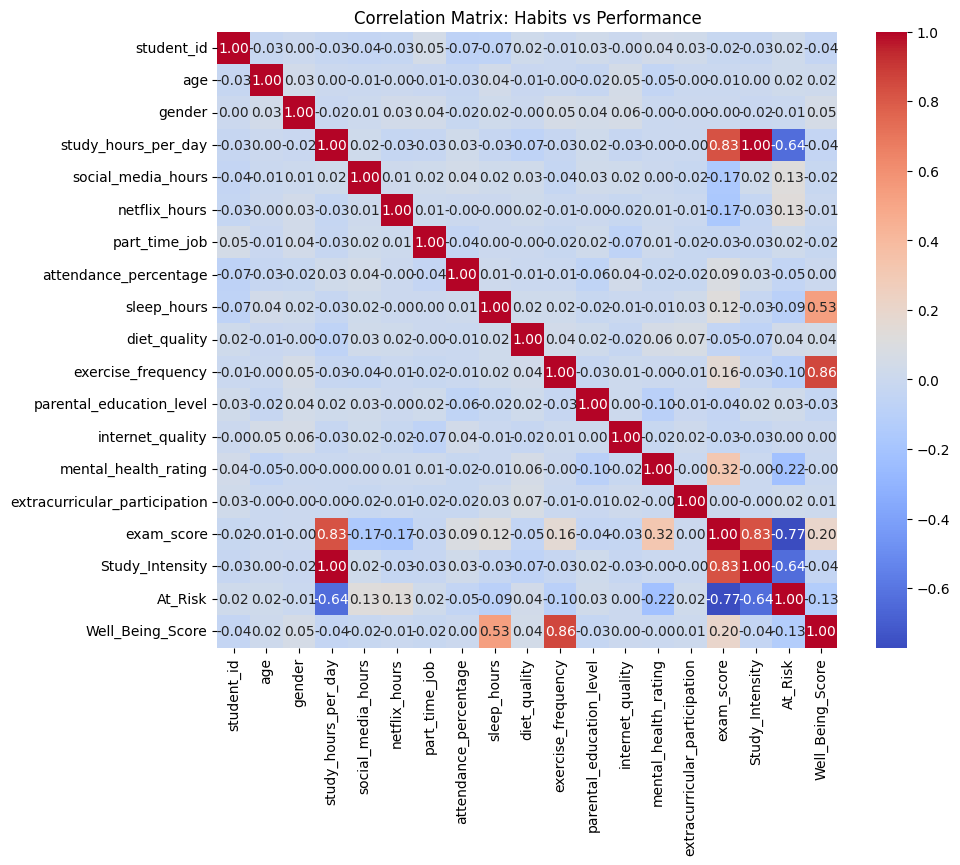

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix: Habits vs Performance")
plt.show()

# 5: Modeling

In [15]:
X = df.drop(columns=['exam_score', 'student_id', 'At_Risk'], errors='ignore')

In [16]:
y_reg = df['exam_score']

In [17]:
y_class = df['At_Risk']

In [18]:
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_reg, y_class, test_size=0.2, random_state=42
)

# Linear regression

In [19]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_reg_train)
y_reg_pred = reg_model.predict(X_test)

In [20]:
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
r2 = r2_score(y_reg_test, y_reg_pred)
print(f"\n--- REGRESSION RESULTS ---\nRMSE: {rmse:.2f}\nR2 Score: {r2:.2f}")


--- REGRESSION RESULTS ---
RMSE: 5.15
R2 Score: 0.90


# Classification

In [21]:
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train, y_class_train)
y_class_pred = clf_model.predict(X_test)

In [22]:
acc = accuracy_score(y_class_test, y_class_pred)
print(f"\n--- CLASSIFICATION RESULTS ---\nAccuracy: {acc*100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_class_test, y_class_pred))


--- CLASSIFICATION RESULTS ---
Accuracy: 94.50%

Confusion Matrix:
[[144   5]
 [  6  45]]


# 6: Visualization of results

In [23]:
importances = clf_model.feature_importances_
indices = np.argsort(importances)[-5:]

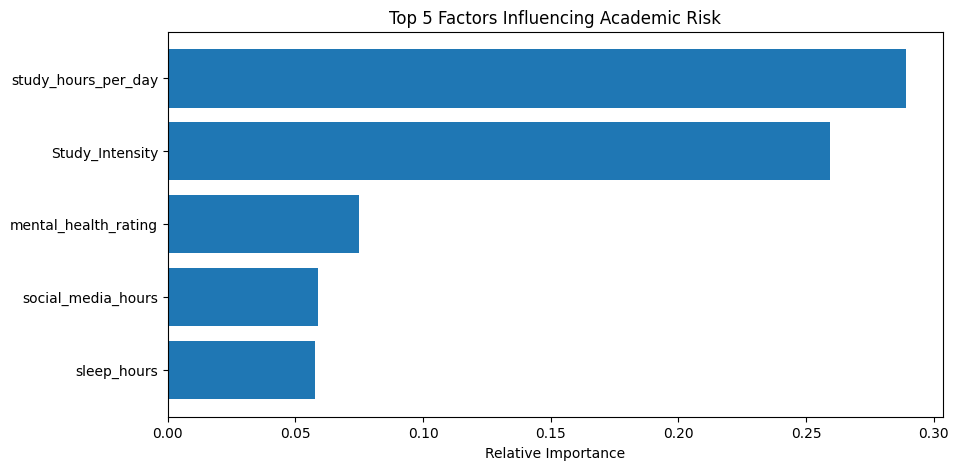

In [24]:
plt.figure(figsize=(10, 5))
plt.title('Top 5 Factors Influencing Academic Risk')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()